In [52]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train',  remove = ('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove = ('headers', 'footers', 'quotes'))

from pprint import pprint
pprint(list(newsgroups_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [53]:
newsgroups_train.filenames.shape

(11314,)

In [54]:
newsgroups_train.data[0:2]

['I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.',
 "A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't an

In [55]:
newsgroups_test.data[0:2]

['I am a little confused on all of the models of the 88-89 bonnevilles.\nI have heard of the LE SE LSE SSE SSEI. Could someone tell me the\ndifferences are far as features or performance. I am also curious to\nknow what the book value is for prefereably the 89 model. And how much\nless than book value can you usually get them for. In other words how\nmuch are they in demand this time of year. I have heard that the mid-spring\nearly summer is the best time to buy.',
 'I\'m not familiar at all with the format of these "X-Face:" thingies, but\nafter seeing them in some folks\' headers, I\'ve *got* to *see* them (and\nmaybe make one of my own)!\n\nI\'ve got "dpg-view" on my Linux box (which displays "uncompressed X-Faces")\nand I\'ve managed to compile [un]compface too... but now that I\'m *looking*\nfor them, I can\'t seem to find any X-Face:\'s in anyones news headers!  :-(\n\nCould you, would you, please send me your "X-Face:" header?\n\nI *know* I\'ll probably get a little swamped, but

In [64]:
print(newsgroups_train.target.shape)
print(newsgroups_test.target.shape)

(11314,)
(7532,)


In [58]:
newsgroups_train.target[:2]

array([7, 4])

In [59]:
newsgroups_test.target[:2]

array([7, 5])

In [67]:
newsgroups_train.target_names[7]

'rec.autos'

In [60]:
import pandas as pd
pd.set_option("display.max_colwidth" , 200)
data = pd.DataFrame(newsgroups_train.data, columns=["data"])
print(data.shape)
data.head()

(11314, 1)


,data
0,"I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors..."
1,A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top sp...
2,"well folks, my mac plus finally gave up the ghost this weekend after\nstarting life as a 512k way back in 1985. sooo, i'm in the market for a\nnew machine a bit sooner than i intended to be...\n\..."
3,\nDo you have Weitek's address/phone number? I'd like to get some information\nabout this chip.\n
4,"From article <C5owCB.n3p@world.std.com>, by tombaker@world.std.com (Tom A Baker):\n\n\nMy understanding is that the 'expected errors' are basically\nknown bugs in the warning system software - thi..."


In [63]:
data["target"] = newsgroups_train.target
data['label'] = data['target'].map(lambda x: newsgroups_train.target_names[x])
print(data.shape)
data.head()

(11314, 3)


,data,target,label
0,"I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors...",7,rec.autos
1,A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top sp...,4,comp.sys.mac.hardware
2,"well folks, my mac plus finally gave up the ghost this weekend after\nstarting life as a 512k way back in 1985. sooo, i'm in the market for a\nnew machine a bit sooner than i intended to be...\n\...",4,comp.sys.mac.hardware
3,\nDo you have Weitek's address/phone number? I'd like to get some information\nabout this chip.\n,1,comp.graphics
4,"From article <C5owCB.n3p@world.std.com>, by tombaker@world.std.com (Tom A Baker):\n\n\nMy understanding is that the 'expected errors' are basically\nknown bugs in the warning system software - thi...",14,sci.space


<Axes: >

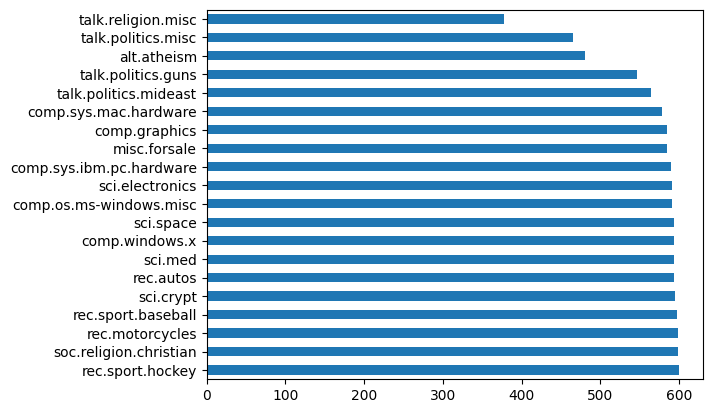

In [75]:
data['label'].value_counts().plot(kind = "barh")

In [76]:
X = data['data']
y = data['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [79]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [80]:
predictions = classifier.predict(X_test_vec)

In [81]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, predictions)
print('Classification Report:\n', report)

Accuracy: 0.58
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.89      0.32      0.47        97
           comp.graphics       0.56      0.59      0.58       104
 comp.os.ms-windows.misc       0.75      0.03      0.05       115
comp.sys.ibm.pc.hardware       0.55      0.70      0.61       123
   comp.sys.mac.hardware       1.00      0.34      0.51       126
          comp.windows.x       0.49      0.90      0.64       106
            misc.forsale       0.88      0.59      0.70       109
               rec.autos       0.90      0.50      0.65       139
         rec.motorcycles       0.93      0.47      0.62       122
      rec.sport.baseball       0.58      0.71      0.63       102
        rec.sport.hockey       0.90      0.72      0.80       108
               sci.crypt       0.46      0.86      0.60       125
         sci.electronics       0.77      0.54      0.63       114
                 sci.med       0.83 

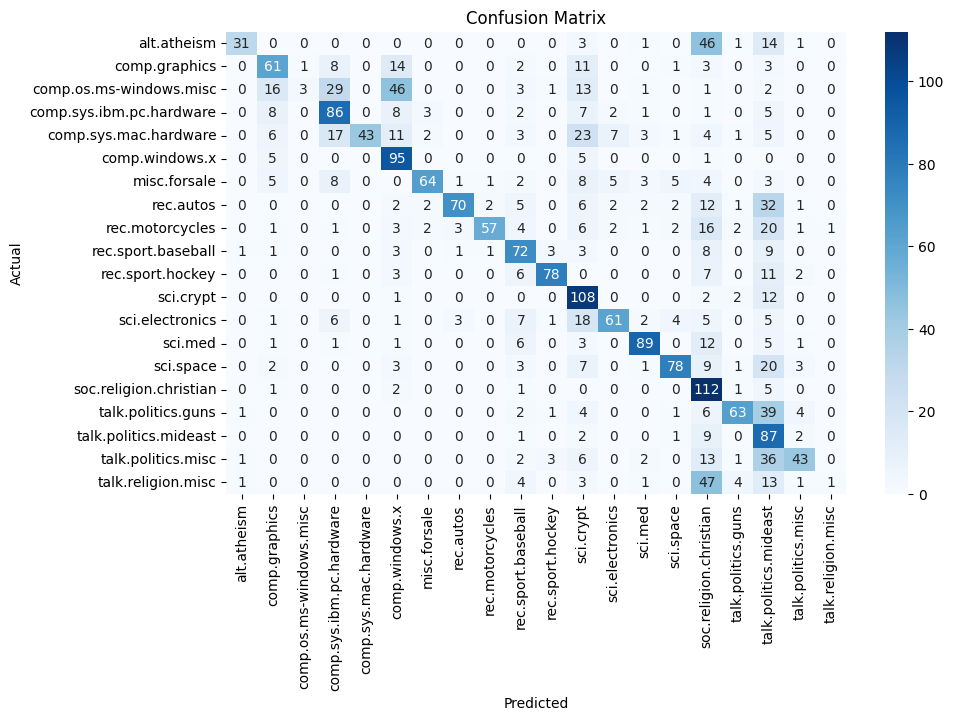

In [84]:
# Visualize confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups_train.target_names, yticklabels=newsgroups_train.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()